# Exploring data

Before starting a detailed data analysis, it is necessary to import the necessary libraries that will be needed in the process of conducting further research.

In [1]:
import warnings
from math import gcd

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from scipy import stats as st

RANDOM_STATE = 12345
ALPHA = 0.05

# Ignoring warnings
warnings.filterwarnings("ignore")

Now, after getting access to the necessary modules and functions, we can use the `read_csv()` method of the `pandas` library to read the dataset file `games.csv` and save the result to a DataFrame, which we will call `games_data`.

In [2]:
games_data = pd.read_csv("datasets/games.csv")

Having successfully read the data and saved it to a variable, consider random 10 lines of the `games_data` DataFrame using the `sample()` method.

In [3]:
games_data.sample(n=10, random_state=RANDOM_STATE)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
995,Golden Sun,GBA,2001.0,Role-Playing,0.93,0.38,0.40,0.06,91.0,9.3,E
2018,MotorStorm: Arctic Edge,PSP,2009.0,Racing,0.16,0.57,0.00,0.29,79.0,8.8,T
9361,Dragon Age Origins: Awakening,PC,2010.0,Role-Playing,0.01,0.10,0.00,0.02,NaN,NaN,NaN
352,FIFA Soccer 10,PS3,2009.0,Sports,0.60,2.45,0.05,0.52,91.0,7.6,E
2590,Darksiders II,X360,2012.0,Action,0.45,0.27,0.00,0.07,83.0,8,M
8899,LEGO Harry Potter Collection,PS4,2016.0,Action,0.01,0.11,0.00,0.02,73.0,8.1,E10+
11196,Henry Hatsworth in the Puzzling Adventure,DS,2009.0,Puzzle,0.08,0.00,0.00,0.01,82.0,8,E
4388,Virtua Tennis 4,PS3,2011.0,Sports,0.09,0.24,0.03,0.08,69.0,6.6,E
7679,Tiger Woods PGA Tour 06,PSP,2005.0,Sports,0.18,0.00,0.00,0.01,80.0,7.9,E
15912,Stronghold Legends,PC,2006.0,Strategy,0.00,0.01,0.00,0.00,57.0,7.2,T


So, we can see that the dataset does not contain any tab characters or other characters, that is, we managed to correctly read and output the required DataFrame. After quickly running through the result of the output above, we can notice that there is data on various computer games, which are characterized by a fairly extensive list of features, some of which have missing values, distinguished by the value of `NaN`. However, we should consider the entire DataFrame: 10 rows will not be able to reveal all the information about the data. To do this, we will output general information on the DataFrame by printing its concise summary using the `info()` method.

In [4]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


So, we observe the following. The table contains 11 columns that have two data types: `float64` (floating point numbers) and `object` (another data type). Next, let's take a closer look at which columns are included in the DataFrame and what information they contain:

<table>
<thead>
<tr><th>Features</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td><code>Name</code></td><td><i>Name of a game</i></td></tr>
<tr><td><code>Platform</code></td><td><i>Platform</i></td></tr>
<tr><td><code>Year_of_Release</code></td><td><i>Year of release</i></td></tr>
<tr><td><code>Genre</code></td><td><i>Genre of a game</i></td></tr>
<tr><td><code>NA_sales</code></td><td><i>Number of copies sold in North America (millions)</i></td></tr>
<tr><td><code>EU_sales</code></td><td><i>Number of copies sold in Europe (millions)</i></td></tr>
<tr><td><code>JP_sales</code></td><td><i>Number of copies sold in Japan (millions)</i></td></tr>
<tr><td><code>Other_sales</code></td><td><i>Number of copies sold in other countries (millions)</i></td></tr>
<tr><td><code>Critic_Score</code></td><td><i>Critics' rating (100 - max.)</i></td></tr>
<tr><td><code>User_Score</code></td><td><i>Users' rating (10 - max.)</i></td></tr>
<tr><td><code>Rating</code></td><td><i>ESRB rating</i></td></tr>
</tbody>
</table>

Furthermore, we note that the DataFrame includes 16715 rows in total, but the number of `non-null` rows is not equal to that number across the columns, which indicates the presence of a fairly large number of missing values, which will have to be dealt with at the data preprocessing stage. Moreover, violations of the style of writing column names are visible as showcased by combining lowercase letters with uppercase letters. Finally, data type inconsistencies can be traced in some columns: the year in the `Year_of_Release` column cannot be fractional in any way, and the user rating in `User_Score` is specified as the `object` type, the reason for which remains to be found out.

Lastly, consider histograms for all numeric columns of the DataFrame.

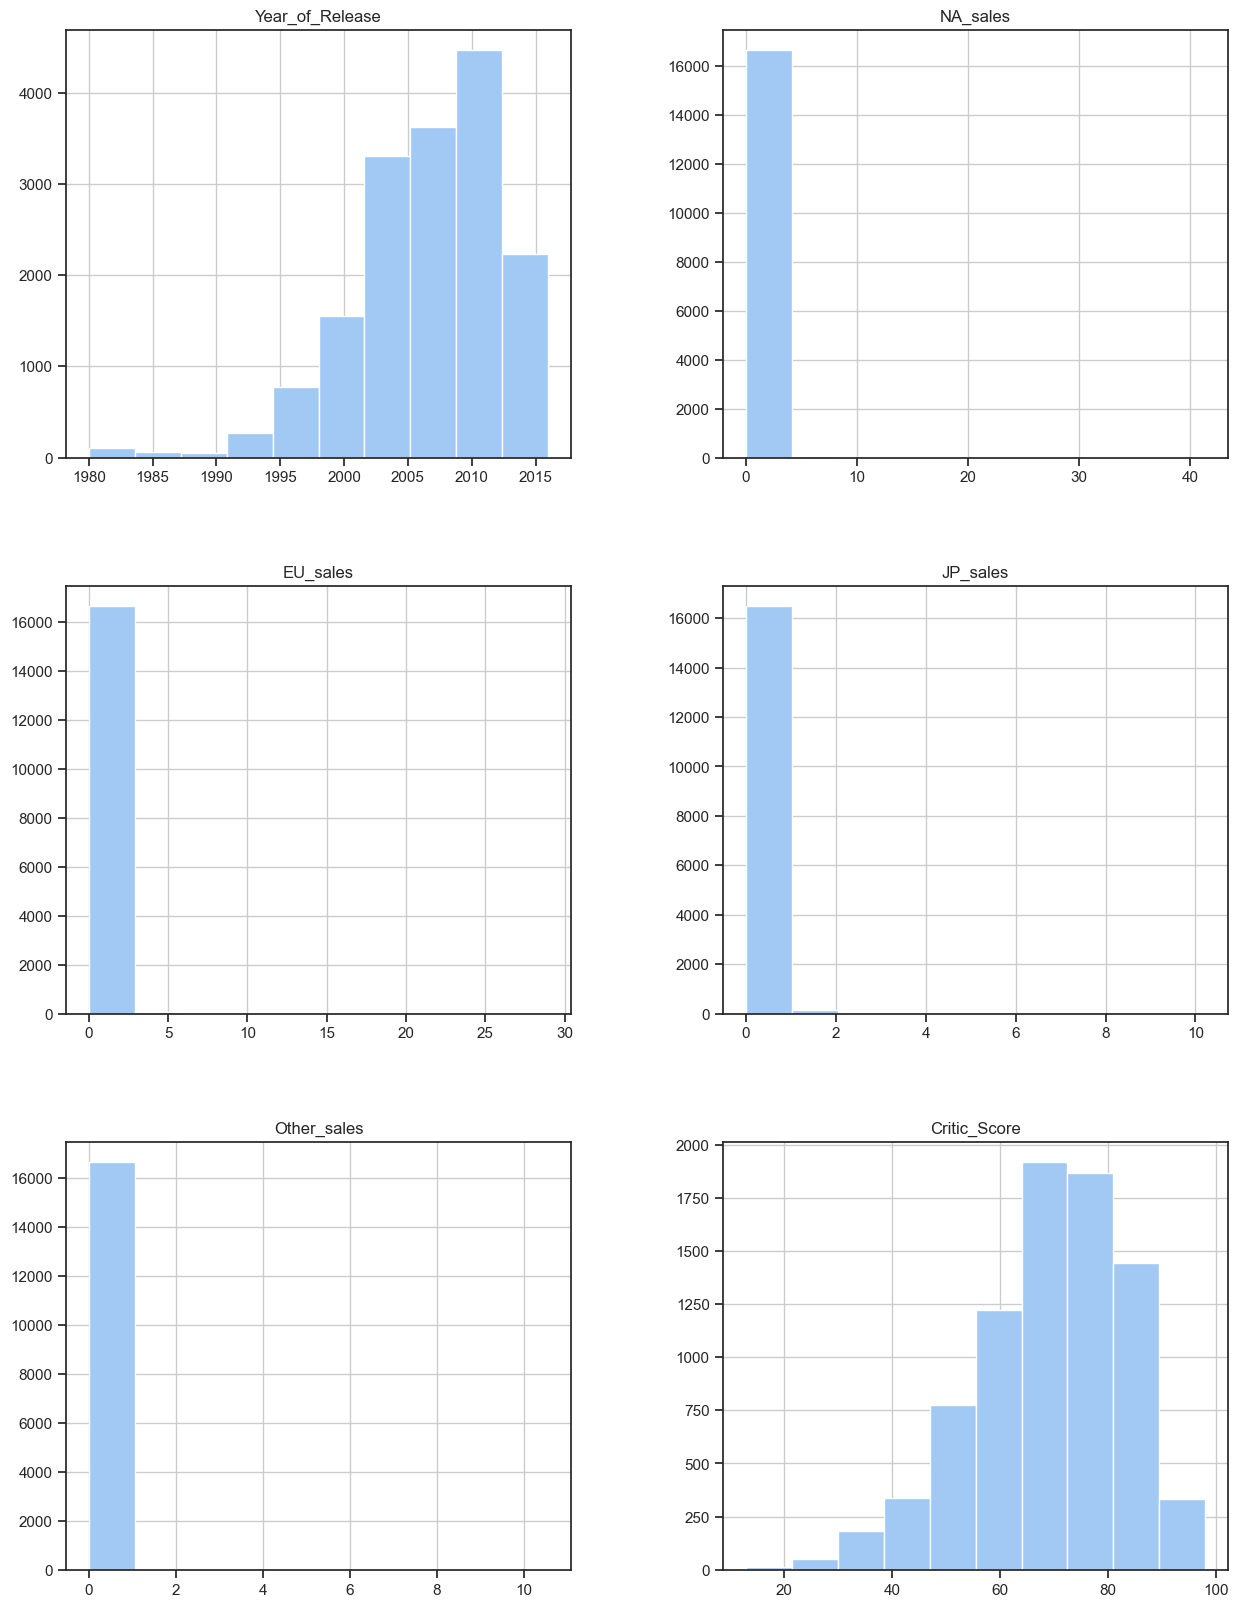

In [5]:
sns.set_theme(style="ticks", palette="pastel")

games_data.hist(figsize=(15, 20))
plt.show()

**Conclusion**

As a result of downloading the dataset, it was possible to determine which data will be used in the process of conducting the study as well as to identify the main problems that will have to be dealt with at the next stage - the stage of data preparation:

1. Violations of the style of headings.
2. Missing values.
3. Data type inconsistencies.

# Data preprocessing

## Column names style

In order to simplify further analysis, we will convert the current column names of the `games_data` DataFrame into names that correspond to the standard style of columns naming. In this case, the only thing to fix is to replace uppercase letters with lowercase ones. 

In [6]:
games_data.columns = games_data.columns.str.lower()

Now, we can look at the results of the changes we have made.

In [7]:
display(games_data.sample(n=5, random_state=RANDOM_STATE))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
995,Golden Sun,GBA,2001.0,Role-Playing,0.93,0.38,0.40,0.06,91.0,9.3,E
2018,MotorStorm: Arctic Edge,PSP,2009.0,Racing,0.16,0.57,0.00,0.29,79.0,8.8,T
9361,Dragon Age Origins: Awakening,PC,2010.0,Role-Playing,0.01,0.10,0.00,0.02,NaN,NaN,NaN
352,FIFA Soccer 10,PS3,2009.0,Sports,0.60,2.45,0.05,0.52,91.0,7.6,E
2590,Darksiders II,X360,2012.0,Action,0.45,0.27,0.00,0.07,83.0,8,M


We see that the conversion of column names to those with lowercase letters was carried out successfully. The next step is to solve the problem of missing values.

## Missing values

Before changing the data type in the columns, it would be more rational to first deal with the missing values. For example, applying type transformations to `int64` in the `year_of_release` column will result in an error, because this column contains `NaN` values - identifiers of missing values. The interpreter simply will not understand how to convert the `NaN` values of the `float` type to an integer.

Thus, let's look at what missing values are in the DataFrame. We will make use of `identify_missing_values()` function defined below.

In [8]:
def identify_missing_values(data):
    """Performs missing values computation.

    Function computes a number and share of missing values
    in DataFrame columns which have NaN-values present
    and displays data types of such columns.

    Parameters
    ----------
    data : DataFrame
        DataFrame which needs to be checked for missing values.

    Returns
    -------
    DataFrame or None
        DataFrame with column names/their data types, number of
        missing values and shares of NaN-values in such columns,
        or None if no missing values have been found.
    """
    # Verifying the presence of missing values
    miss_vals_num = data.isnull().sum()[data.isnull().sum() > 0]
    if miss_vals_num.empty:
        return None

    # Creating a table with numbers of missing values
    cols = {"missing_count": miss_vals_num.values}
    nans_df = pd.DataFrame(data=cols, index=miss_vals_num.index).sort_values(
        by="missing_count", ascending=False
    )

    # Adding shares of missing values
    nans_df["missing_fraction"] = nans_df["missing_count"] / data.shape[0]
    nans_df["missing_fraction"] = nans_df["missing_fraction"].round(4)

    # Adding data types
    nans_df["dtype"] = data[nans_df.index].dtypes
    nans_df = nans_df[["dtype", "missing_count", "missing_fraction"]]

    return nans_df

In [9]:
# Computing the number and percentage of missing values in the DataFrame
miss_vals_df = identify_missing_values(data=games_data)
display(miss_vals_df)

,dtype,missing_count,missing_fraction
critic_score,float64,8578,0.5132
rating,object,6766,0.4048
user_score,object,6701,0.4009
year_of_release,float64,269,0.0161
name,object,2,0.0001
genre,object,2,0.0001


So, we can see that there are several columns in which there is less than 2% of the missing values: `name`, `year_of_release` and `genre`. It will be difficult to replace the year numbers and game names in the `name` and `year_of_release` columns, since it is almost impossible to guess in which year a certain game was released and with which name. Usually, when there are 5-10% omissions in a column, it is better to delete them to save time, and, moreover, since it is logically impossible to conduct missing values replacements here, we will delete the rows with omissions in the columns `name` and `year_of_release`. The `genre` column may actually be informative in the future, but it would be more logical to delete the existing 2 omissions due to the fact that the fact of distortion of the research results as a result of deleting these omissions is unlikely.

In [10]:
least_nan_cols = miss_vals_df[miss_vals_df["missing_fraction"] < 0.1].index
games_data = games_data.dropna(subset=least_nan_cols)

Further, we can see that the last three columns contain quite a large number of omissions: from 40 to 51% of the values in the columns `critic_score`, `user_score` and `rating`. We cannot afford to delete all these missing values, because after removing almost half of the gaps in each column, a large amount of information will be lost, which could potentially distort the final results. Thus, we need to find a way to replace these missing values.

The first logical way to fill in missing values is to use median computed for this column, but, unfortunately, there is one major problem with this. The data from this column is not a set of random observations. If we had a sample of user ratings based on reviews for one game, then it could be considered random data. One user rated a game as a 1, another as a 10. One didn't like the game, the other liked it. We can replace the gaps in such a sample with an average/median/mode, since all the data relate to the same game.

In this case, the rating is an average of a sample of user ratings for one game and is a feature of this particular game, regardless of genre, platform, etc. Moreover, if we look closely at the dataset, we can find examples when one game on different platforms has a twofold difference in user ratings. It is possible that not all platforms can achieve high quality graphics, speed, etc. The critics' feedback is also formed. A certain number of critics tested the game, gave their rating, which was then averaged and assigned to a specific game. That is, the critics' review has become an integrated feature of a particular game and does not depend on the genre, platform, etc. Therefore, the omissions of reviews cannot be filled in with synthetic data extracted from the ratings of other games.

Hence, since we cannot just fill in missing values in a usual way, we can replace them with some placeholder values, in this case, -999. Take `critic_score`, for instance: by making such a replacement we get rid of missing values but will have to filter out such values at a further data analysis stage. Thus, let's fill in missing values in this column first.

In [11]:
# Filling in missing values with a placeholder (-999)
games_data["critic_score"] = games_data["critic_score"].fillna(-999)

Now consider the `rating` column containing string values with a certain rating category. We cannot delete such a large number of omissions, but it is also not possible to leave it as it is. In fact, there is a reason for the presence of such a large number of omitted values in this column. ESRB rating is computed and assigned to games that were developed in the North America, while we do not have the data on ratings assigned to games in other regions like Europe or Japan. Hence, the number of omissions can reflect the number of games developed in regions other than the North America. 

As explained above, one of the replacement methods is to fill in the values of `NaN` with a single placeholder value. Let's fill in missing values with `unknown`.

In [12]:
# Filling in missing values with a placeholder ('unknown')
games_data["rating"] = games_data["rating"].fillna("unknown")

Finally, consider the `user_score` column, which is notable for the fact that there are non-numeric rating values contained here - string values. Let's figure out why this is so by first displaying a list of unique user rating values.

In [13]:
print(games_data["user_score"].sort_values().unique())

['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.1' '5.2'
 '5.3' '5.4' '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4'
 '6.5' '6.6' '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.3' '7.4' '7.5' '7.6'
 '7.7' '7.8' '7.9' '8' '8.1' '8.2' '8.3' '8.4' '8.5' '8.6' '8.7' '8.8'
 '8.9' '9' '9.1' '9.2' '9.3' '9.4' '9.5' '9.6' '9.7' 'tbd' nan]


We can notice that, in addition to the missing values, there is an unknown value written as `tbd`. In fact, it means "to be determined" - a pseudo-rating that is assigned to games with an insufficient number of reviews. It is quite possible that this value led to a change in the column type to `object`. Let's consider this unassigned rating in more detail. Let's see if there are many games in the DataFrame that have such a value using the `value_counts()` method.

In [14]:
# Counting the number of games with a specific "user_score" rating
games_data["user_score"].value_counts(normalize=True)

tbd    0.241488
7.8    0.032727
8      0.028966
8.2    0.028052
8.3    0.025612
         ...   
0.6    0.000203
1.5    0.000203
1.3    0.000203
9.7    0.000102
0      0.000102
Name: user_score, Length: 96, dtype: float64

The number of games with "to be determined" rating is quite large: about 24% of all games. We cannot just delete these rows as we will lose relevant information contained in them. Instead, we can also treat them as missing values and replace them with -999.

In [15]:
# Filling in rows with "tbd" with a placeholder (-999)
games_data.loc[games_data["user_score"] == "tbd", "user_score"] = "-999"

Now we can replace the remaining string values in this column with floating point values using the `to_numeric()` method.

In [16]:
# Conversion to float
games_data["user_score"] = pd.to_numeric(games_data["user_score"])

Let's take a look at the unique values in this column after changes made.

In [17]:
print(games_data["user_score"].sort_values().unique())

[-9.99e+02  0.00e+00  2.00e-01  3.00e-01  5.00e-01  6.00e-01  7.00e-01
  9.00e-01  1.00e+00  1.10e+00  1.20e+00  1.30e+00  1.40e+00  1.50e+00
  1.60e+00  1.70e+00  1.80e+00  1.90e+00  2.00e+00  2.10e+00  2.20e+00
  2.30e+00  2.40e+00  2.50e+00  2.60e+00  2.70e+00  2.80e+00  2.90e+00
  3.00e+00  3.10e+00  3.20e+00  3.30e+00  3.40e+00  3.50e+00  3.60e+00
  3.70e+00  3.80e+00  3.90e+00  4.00e+00  4.10e+00  4.20e+00  4.30e+00
  4.40e+00  4.50e+00  4.60e+00  4.70e+00  4.80e+00  4.90e+00  5.00e+00
  5.10e+00  5.20e+00  5.30e+00  5.40e+00  5.50e+00  5.60e+00  5.70e+00
  5.80e+00  5.90e+00  6.00e+00  6.10e+00  6.20e+00  6.30e+00  6.40e+00
  6.50e+00  6.60e+00  6.70e+00  6.80e+00  6.90e+00  7.00e+00  7.10e+00
  7.20e+00  7.30e+00  7.40e+00  7.50e+00  7.60e+00  7.70e+00  7.80e+00
  7.90e+00  8.00e+00  8.10e+00  8.20e+00  8.30e+00  8.40e+00  8.50e+00
  8.60e+00  8.70e+00  8.80e+00  8.90e+00  9.00e+00  9.10e+00  9.20e+00
  9.30e+00  9.40e+00  9.50e+00  9.60e+00  9.70e+00       nan]


We see that all rows with undefined rating were filled in with a number of -999. We can now fill in the remaining missing values with a placeholder value. Using median as a placeholder is not correct here due to reasons explained above.

In [18]:
# Filling in missing values with a placeholder (-999)
games_data["user_score"] = games_data["user_score"].fillna(-999)

Let's check the number of missing values again to make sure we have dealt with missing values problem.

In [19]:
# Verifying if missing values are processed
identify_missing_values(data=games_data)

Lastly, let's verify for identical rows in the DataFrame using a custom `preprocess_duplicates()` function from `rearden` library.

In [20]:
def preprocess_duplicates(data):
    """Deletes duplicates from a DataFrame."""
    # Computing the number of duplicates in DataFrame
    num_duplicates = data.duplicated().sum()
    # Checking the number of duplicates for nullity
    if num_duplicates != 0:
        # Deleting duplicates
        data.drop_duplicates(inplace=True)
        # Displaying a message attesting the deletion
        print(f"{num_duplicates:,} duplicates found and deleted.")
        return None
    return None

In [21]:
# Computing the number of identical rows
preprocess_duplicates(data=games_data)

There are no duplicates, the missing values have been processed, and the column names have a suitable look. So, let's move on - to checking data types.

## Data types

Let's call the `info()` method again in order to understand for which columns it is necessary to perform type conversion.

In [22]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


So, we see that data type conversion is needed only for one column - the `year_of_release` column. The year cannot be represented as a fraction, so let's convert this column to the `int64` type.

In [23]:
games_data["year_of_release"] = games_data["year_of_release"].astype("int64")

Now, let's print random five rows of the DataFrame and consider the general information again.

In [24]:
display(games_data.sample(n=5, random_state=RANDOM_STATE))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4171,Epic Mickey 2: The Power of Two,PS3,2012,Action,0.21,0.18,0.0,0.08,59.0,4.3,E
13658,Dance Dance Revolution Disney Mix,PS,2000,Simulation,0.02,0.02,0.0,0.00,74.0,8.3,E
15354,Quake 4,PC,2005,Shooter,0.00,0.02,0.0,0.00,81.0,7.6,M
1630,Guitar Hero: Aerosmith,X360,2008,Misc,1.00,0.13,0.0,0.10,70.0,6.7,T
6306,F1 Race Stars,X360,2012,Racing,0.07,0.17,0.0,0.02,64.0,5.7,E


In [25]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


So, all columns now have the correct data type: the name, platform name, genre of the game and rating are string features, the year of release is integer, and metrics such as sales and ratings of critics/users are represented as floating point values.

## Adding auxiliary information

Finally, we will add a new column to the DataFrame, which will include total sales in all regions.

In [26]:
# Computing total sales in all regions
games_data["total_sales"] = games_data.loc[
    :, games_data.columns.str.endswith("_sales")
].sum(axis=1)

**Conclusion**

At this stage, the missing values were preprocessed, data types and column names were converted, and new information was added to the data. Regarding the missing values, rows with missing values in columns with a small number of them (less than 2%) were deleted. A particularly interesting column turned out to be the `user_score` column, which contains, in addition to numerical ratings, string ratings `tbd`, which there is a high number of and therefore were not deleted, but processed like omissions as placeholders equal to -999. The same strategy was applied to the omissions of the `critic_score` column, and the omissions in `rating` were replaced with `unknown`. Further, the data types have been converted, and the column names have been changed to names with lowercase letters. Finally, the DataFrame was supplemented with data on the total number of sales.

One reason for omissions, for example in the ESRB rating column, is that this rating is issued only for games released in North America. Thus, if the game was released, for example, in Japan, Europe or another region of the world, the game will not receive a rating and, accordingly, a missing value will appear in the data. Omissions in columns with a user rating could appear due to the absence of any ratings of such games, or at some point the system began to perceive games with an uncertain rating as omissions. As for the critics' ratings - the same logic, that is, there could be games that were not critically evaluated, and therefore there were omissions. Finally, what is true for any omissions in the data at all, the reason for the appearance of missing values could be due to a human factor or a system failure: data parsing could have been carried out carelessly or some data could not have been entered on the website.

# Exploratory data analysis

## Overview of computer games industry

Let's take a look at how many games were released in different years. To do this, we can build a bar chart, where the years will be on the X axis and the Y axis will have the number of computer games released in a particular year.

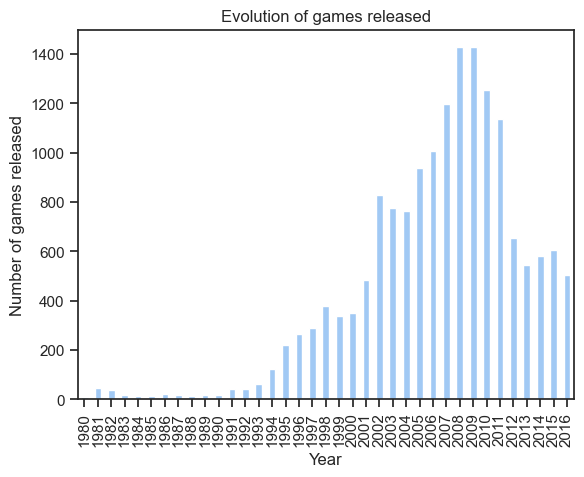

In [27]:
# Plotting the yearly evolution of the number of released games
(
    games_data.groupby("year_of_release")["name"]
    .count()
    .plot(
        kind="bar",
        title="Evolution of games released",
        xlabel="Year",
        ylabel="Number of games released",
    )
)
plt.show()

On the graph above, we can observe the following. The number of games released remained quite low in the period 1980-1994, since the growth of the computer games industry was just beginning to take off during this period. However, since 1995, the growth in the number of games released has become more and more exponential, increasing almost every year more and more due to the development of IT technologies. We will not need data for all periods, since, as can be seen on the graph, technologies and user preferences have been changing, which has led to the obsolescence of some games and platforms and the emergence of new ones. In other words, it is worth choosing a relevant period that is relatively close to the forecast period (year 2017), but at the same time includes a sufficient amount of data.

## Analysis of overall sales by platform

Now let's look at sales, namely, at how they changed across platforms. This will allow for not only identifying the platforms with the highest total sales but will also help to outline the boundaries of the relevant period. To begin with, let's look at the total sales across all platforms.

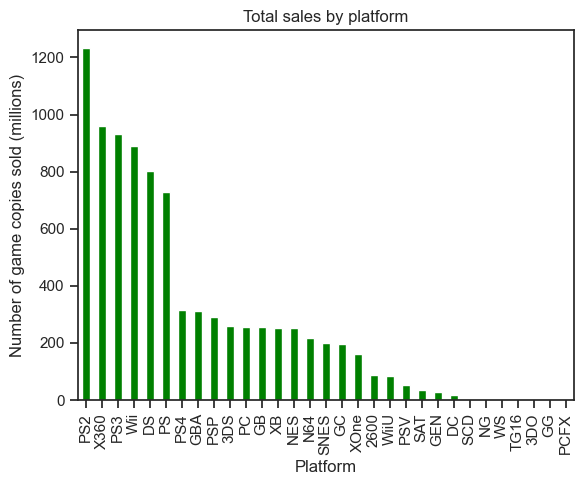

In [28]:
# Computing total sales by platform
(
    games_data.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        title="Total sales by platform",
        color="green",
        xlabel="Platform",
        ylabel="Number of game copies sold (millions)",
    )
)
plt.show()

In the graph above, we can see the total sales for each of the platforms, where the corresponding sales were grouped by platform and summed up by all available years. The following platforms are clearly visible and leading in total sales:

* **PS2**
* **X360**
* **PS3**
* **Wii**
* **PS**
* **DS**

Let's take these platforms and consider their distribution of total sales by year. For this let's first create a function `make_barplots_platform()`, which will be helpful for creating subplots of yearly sales by platform. Specifically, the function will plot total sales broken down by platform for years available in data and responsively will choose the dimensions of the figure.

In [29]:
def make_barplots_platform(data, include_best=False):
    """Plots total sales broken down by years and platform.

    Parameters
    ----------
    data : DataFrame
        DataFrame with game platforms info.
    include_best : bool, default=False
        Indicator to include only top-6 platforms from data.
    """
    # Including only top-6 platforms
    if include_best:
        top_six_platforms = (
            data.groupby("platform")["total_sales"]
            .sum()
            .sort_values(ascending=False)
            .head(6)
        )
        data_filtered = data[data["platform"].isin(top_six_platforms.index)]
        data = data_filtered.copy()

    # Selecting platforms
    platforms = data["platform"].unique()
    num_platforms = platforms.shape[0]

    # Responsively tweaking dimensions of figure
    if num_platforms % 2 == 0:
        figure_dims = (num_platforms // 2, 2)
        figure_size = (20, 2 * num_platforms)
    else:
        figure_dims = (num_platforms, 1)
        figure_size = (20, 5 * num_platforms)

    print(f"Plotting {num_platforms} platform(s)...")

    # Making subplots
    (
        data.groupby(["year_of_release", "platform"])["total_sales"]
        .sum()
        .unstack(1)
        .plot(
            kind="bar",
            subplots=True,
            legend=None,
            figsize=figure_size,
            layout=figure_dims,
            xlabel="Year",
            ylabel="Game copies sold (millions)",
        )
    )
    plt.show()

Plotting 6 platform(s)...


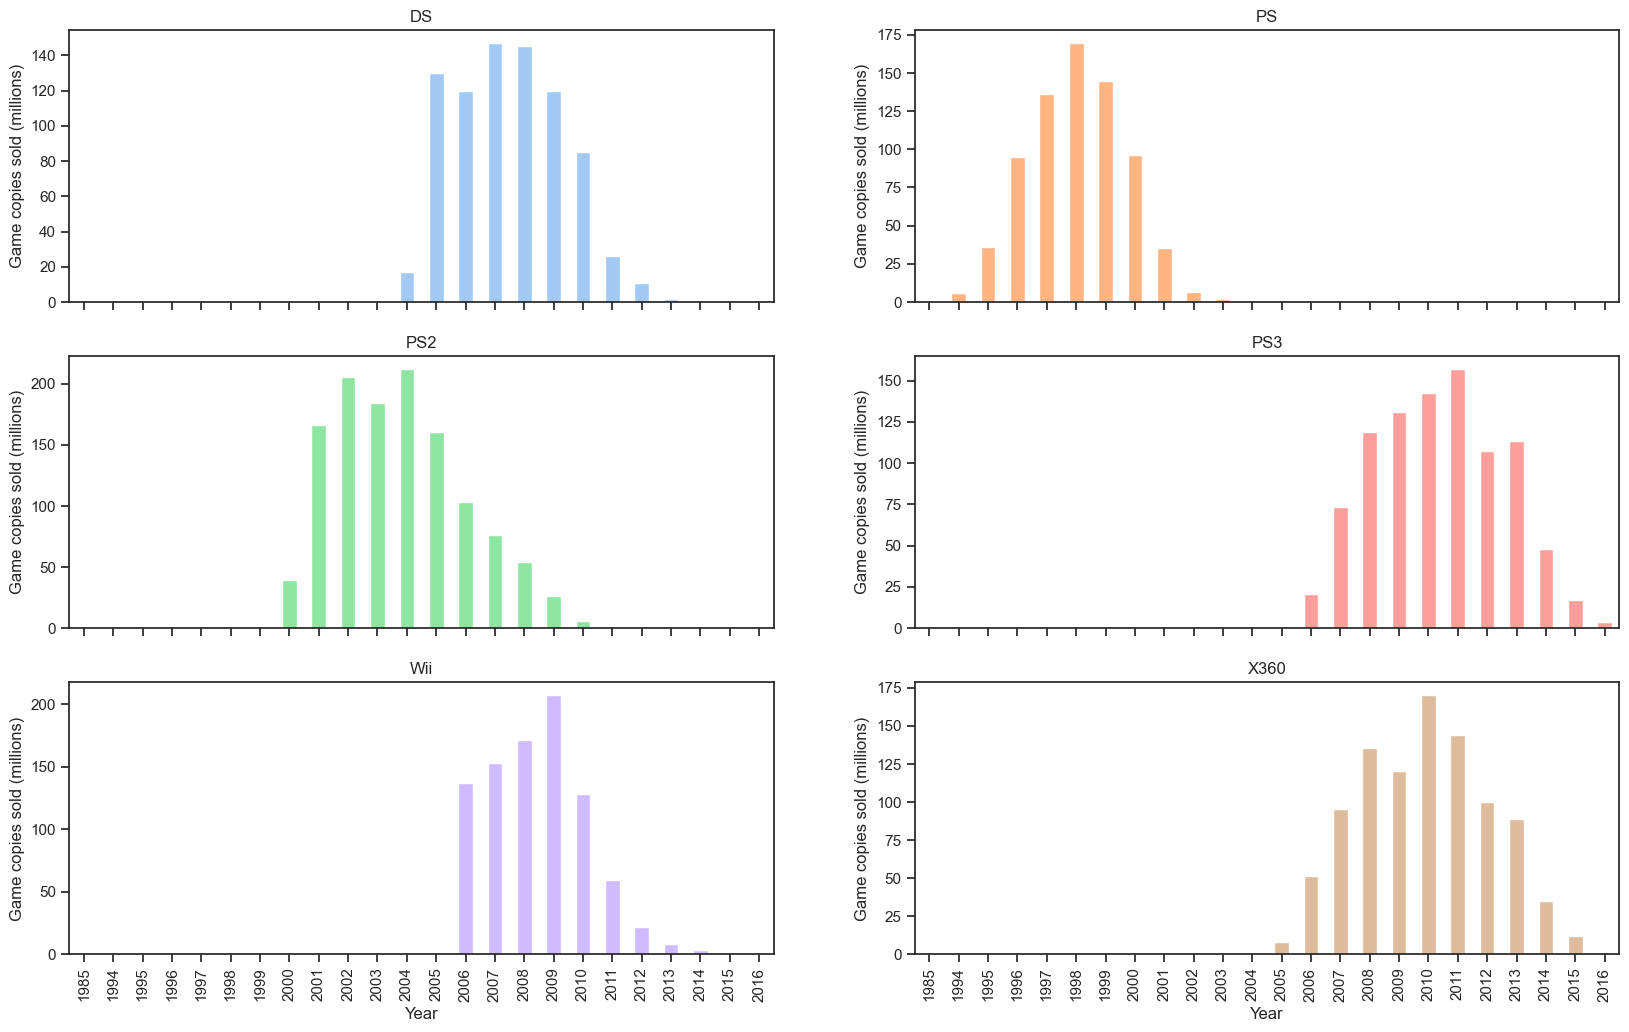

In [30]:
# Plotting top-6 platforms by total sales
make_barplots_platform(data=games_data, include_best=True)

We can observe the following. Among these top-6 platforms, the life cycle of platforms is approximately 9-11 years, starting from the moment they appear on the market and ending with zero sales of computer games on such platforms. As for the appearance and obsolescence of platforms on the market, it can be noted that for the first 5 years since the appearance of a particular platform, sales mainly show growth and eventually reach their peak, but after that, also during 5 years, there is a gradual decline in sales and a corresponding obsolescence of platforms.

## Selecting relevant time period

Before getting to trying to identify and select a list of potentially profitable platforms, we need to choose a period that we will use for motivating our platforms choice. As mentioned previously, not all time periods will be useful for the analysis and, as shown above, computer games industry changes every five years and quite rapidly so, from now on we will restrict our attention to time period 2014-2016. These 3 last years will be useful in identifying hidden patterns in the data and be helpful in choosing promising products in which to invest in year 2017.

In [31]:
# Selecting a relevant period (last three years)
year_2 = max(games_data["year_of_release"])
year_1 = year_2 - 2

relevant_period = games_data["year_of_release"].between(year_1, year_2)
games_data_relev = games_data[relevant_period]

## Platforms analysis

Now that we have filtered the DataFrame to include only the period that will be relevant for making some forecasts in terms of products for 2017, we can consider platforms again by plotting the total sales by each platform in relevant period during 2014-2016.

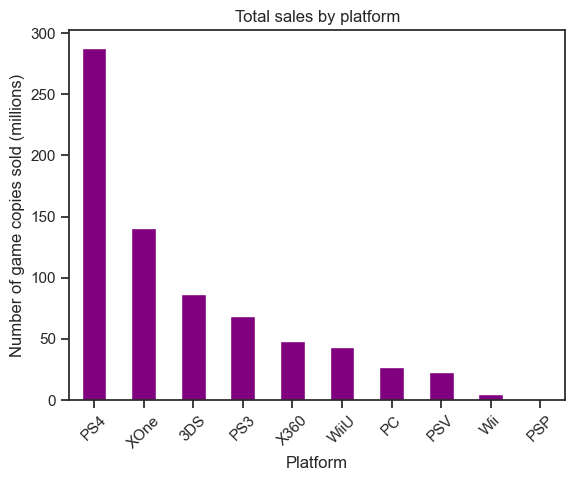

In [32]:
# Plotting total sales by platform in relevant period
(
    games_data_relev.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        title="Total sales by platform",
        color="purple",
        xlabel="Platform",
        ylabel="Number of game copies sold (millions)",
    )
)
plt.xticks(rotation=45)
plt.show()

As we can see, the leaders of the rating are now PS4, XOne, 3DS and PS3. However, it is still worth looking at all these platforms in the context of years to determine what the total sales are made up of.

Plotting 10 platform(s)...


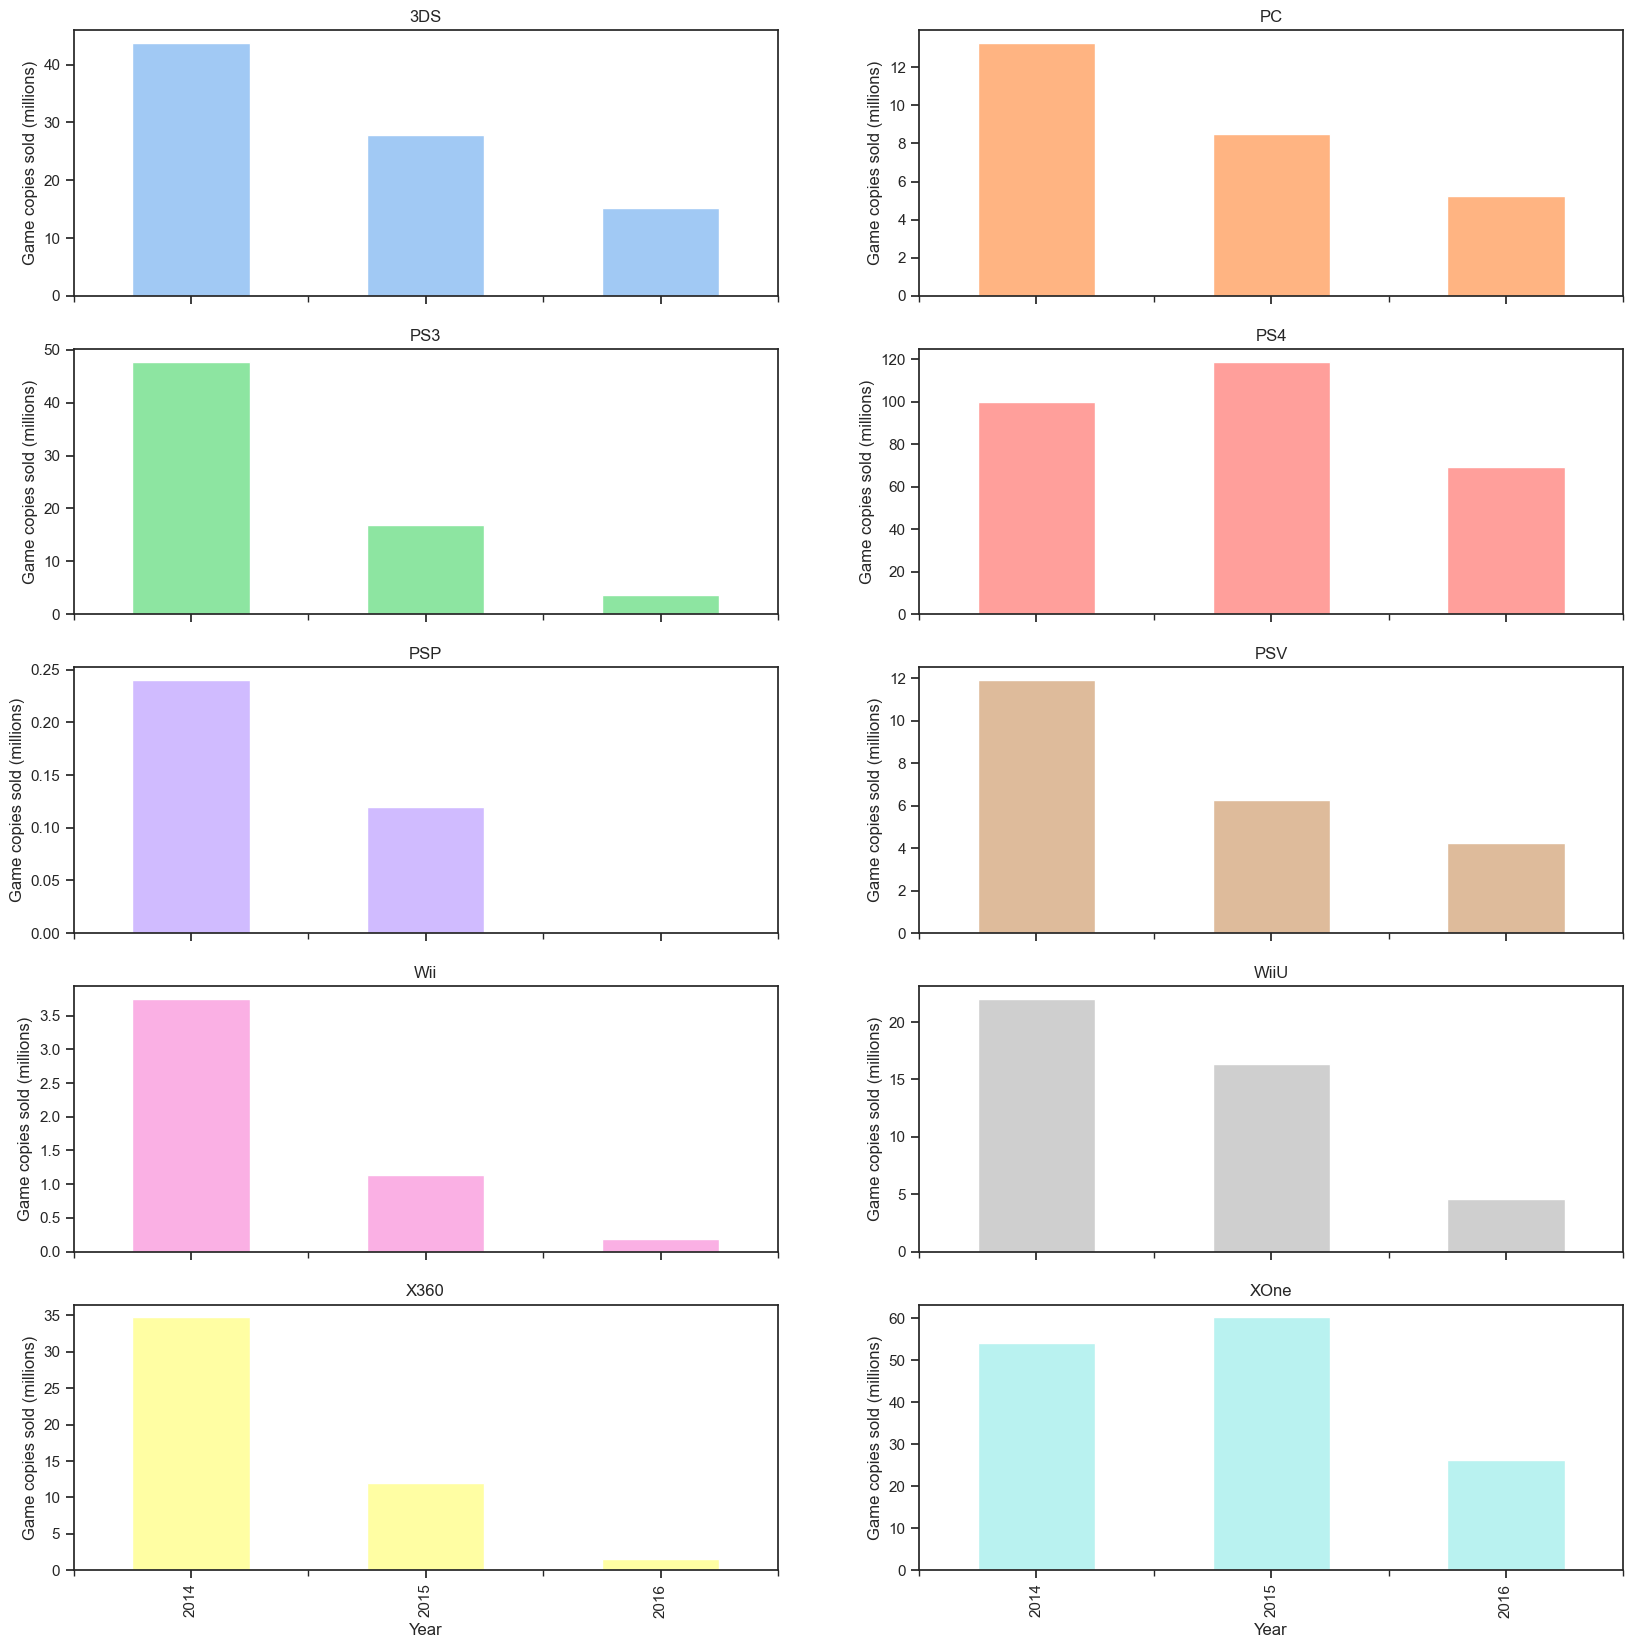

In [33]:
# Plotting platforms for 2014-2016
make_barplots_platform(data=games_data_relev)

So, despite the fact that the total sales of some platforms are quite high during the relevant period, sales of games on some platforms have been falling in recent years, and since sales were high in the early years, we also have high overall sales. For example, take X360: the platform had a pretty successful year in 2014, but over time the popularity of the platform declined. The same applies to PS3, PSV, PC, PSP. Nevertheless, there is a number of promising platforms with XOne and PS4 being the most vivid candidates, which are seen to have been increasing until 2016. We can also include 3DS and WiiU in this group. 

Thus, we will choose the following potentially profitable platforms:

* **PS4**
* **XOne**
* **3DS**
* **WiiU**

Next, consider boxplots of total sales broken down by platforms.

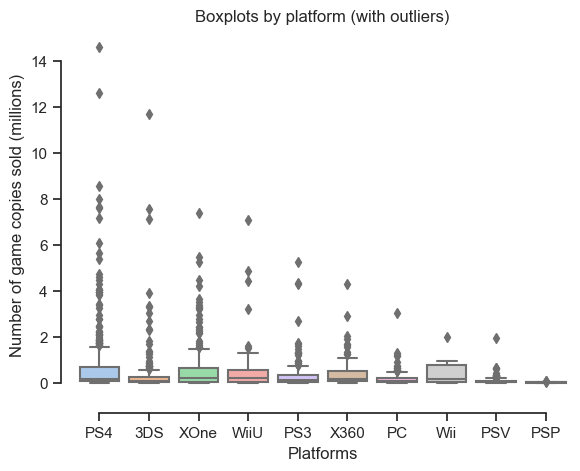

In [34]:
# Plotting boxplots by platform with outliers
figure = sns.boxplot(x="platform", y="total_sales", data=games_data_relev)
figure.set(
    title="Boxplots by platform (with outliers)",
    xlabel="Platforms",
    ylabel="Number of game copies sold (millions)",
)
sns.despine(offset=10, trim=True)

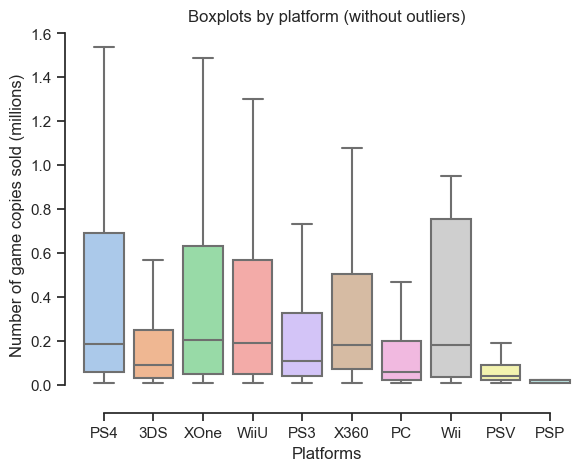

In [35]:
# Plotting boxplots by platform without outliers
figure = sns.boxplot(
    x="platform", y="total_sales", data=games_data_relev, showfliers=False
)
figure.set(
    title="Boxplots by platform (without outliers)",
    xlabel="Platforms",
    ylabel="Number of game copies sold (millions)",
)
sns.despine(offset=10, trim=True)

The results above show that the data for all platforms have outliers, which indicates that the subsample data will have a right-skewed distribution. Some platforms have quite large outliers that suggests that during the development of such platforms they experienced a period of great growth. These are, for example, PS4, PS3, WiiU, X360 and 3DS. This is especially true for the PS4 platform, which had more than 14 million copies sold at some point in time showing the potential profitability of games on this platform. The same can be said about 3DS, XOne and WiiU. Moreover, the width of the boxes of these platforms is quite large, which suggests that the spread of most game sales values on these platforms is quite high and not limited to some small interval, as is the case with PSP and PSV. Lastly, the median sales of game copies are also quite large for PS4, XOne, WiiU and X360.

## Correlation analysis

Now let's look at the gaming platforms together and see how the reviews of users and critics affect the sales of games on such platforms. To do this, we calculate the correlation and construct scatterplots. In order to make displaying a lot of plots more convenient, let's use the same plotting method and plot subplots using a defined `make_scatterplots_platform()` function which will responsively adjust the dimensions of the figure in order to display it in the best way possible regardless of the number of platforms in the data.  

In [36]:
def make_scatterplots_platform(data, x, y):
    """Makes scatterplots by platform.

    A function automatically adjusts the dimensions of
    the figure to display scatterplots in the best possible way.

    Parameters
    ----------
    data : DataFrame
        DataFrame with game platforms info.
    x : str
        Variable on X-axis of the scatterplot.
    y : str
        Variable on Y-axis of the scatterplot.
    """
    # Filtering out placeholders
    data = data[data[x] != -999]

    # Selecting platforms
    platforms = data["platform"].unique()
    num_platforms = platforms.shape[0]

    # Responsively setting the number of columns
    if num_platforms % 2 == 0:
        num_cols = num_platforms // 2
    else:
        if (num_platforms != 3) & (
            num_platforms / gcd(num_platforms, 3) != num_platforms
        ):
            num_cols = int(num_platforms / gcd(num_platforms, 3))
        else:
            num_cols = (num_platforms + 1) // 2

    # Plotting only one scatterplot
    if num_platforms == 1:
        data_filtered = data[data["platform"] == platforms[0]]
        corr = data_filtered[y].corr(data_filtered[x])
        sns.scatterplot(data=data_filtered, x=x, y=y, label=platforms[0])
        plt.title(rf"$\rho$ = {corr:.2f}")
    # Plotting more than one scatterplot
    else:
        # Case 1: Platforms can be plotted on all axes allocated
        if num_platforms % num_cols == 0:
            # Plotting two scatterplots differently
            if num_platforms == 2:
                fig, axes = plt.subplots(
                    nrows=num_cols,
                    ncols=num_platforms // num_cols,
                    figsize=(5 * num_platforms // num_cols, 5 * num_cols),
                )
            # Other cases
            else:
                fig, axes = plt.subplots(
                    nrows=num_platforms // num_cols,
                    ncols=num_cols,
                    figsize=(5 * num_cols, 5 * num_platforms // num_cols),
                )
            # Flattening axes matrix
            axes = axes.reshape(
                (num_platforms // num_cols) * num_cols,
            )
        # Case 2: Platforms cannot be plotted on all axes allocated
        else:
            rows = (num_platforms // num_cols) + 1

            fig, axes = plt.subplots(
                nrows=rows,
                ncols=num_cols,
                figsize=(5 * num_cols, 5 + 5 * (rows - 1)),
            )
            # Flattening axes matrix
            axes = axes.reshape(
                (rows * num_cols),
            )
            # Turning off the last axis
            axes[-1].axis("off")

        print(f"Plotting {num_platforms} platforms...")

        # Plotting all platforms
        for platform, ax in zip(platforms, axes):
            data_filtered = data[data["platform"] == platform]
            corr = data_filtered[y].corr(data_filtered[x])
            sns.scatterplot(data=data_filtered, ax=ax, x=x, y=y, label=platform)
            ax.set_title(rf"$\rho$ = {corr:.2f}")

        plt.tight_layout()
        plt.show()

Plotting 8 platforms...


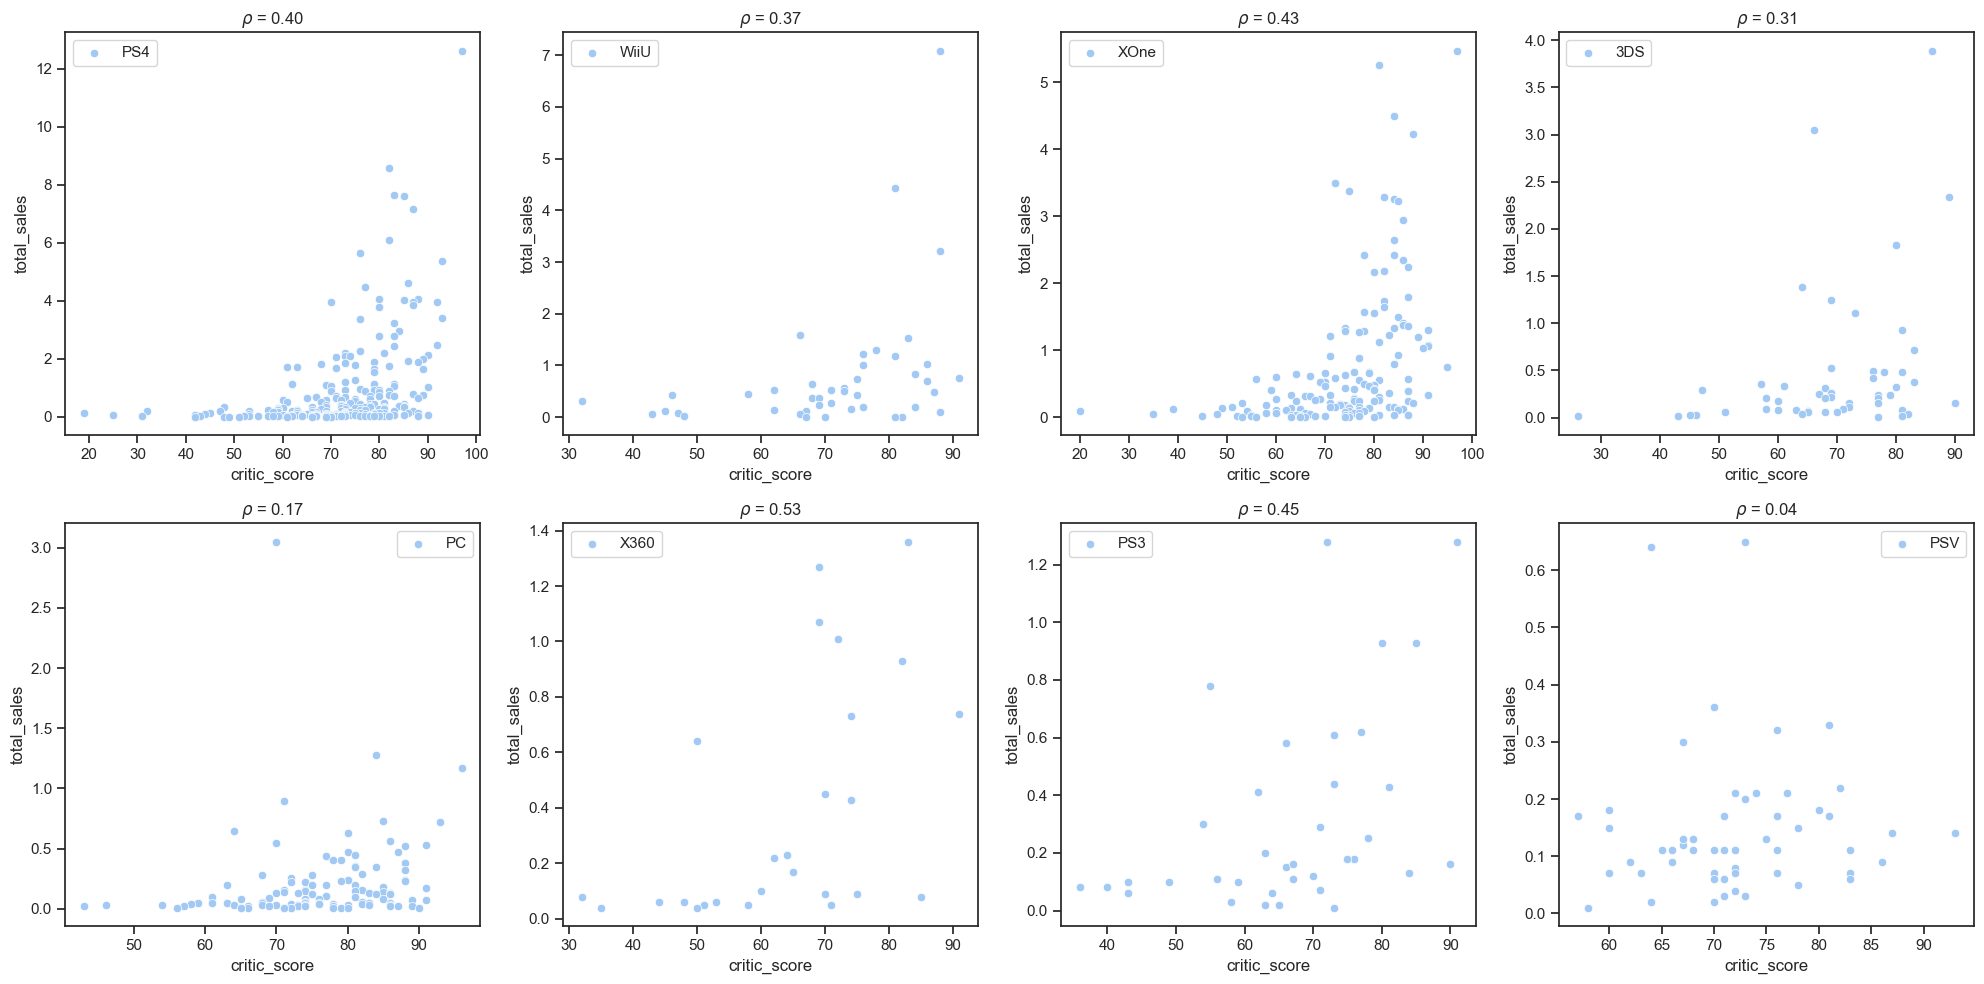

In [37]:
make_scatterplots_platform(data=games_data_relev, x="critic_score", y="total_sales")

Plotting 9 platforms...


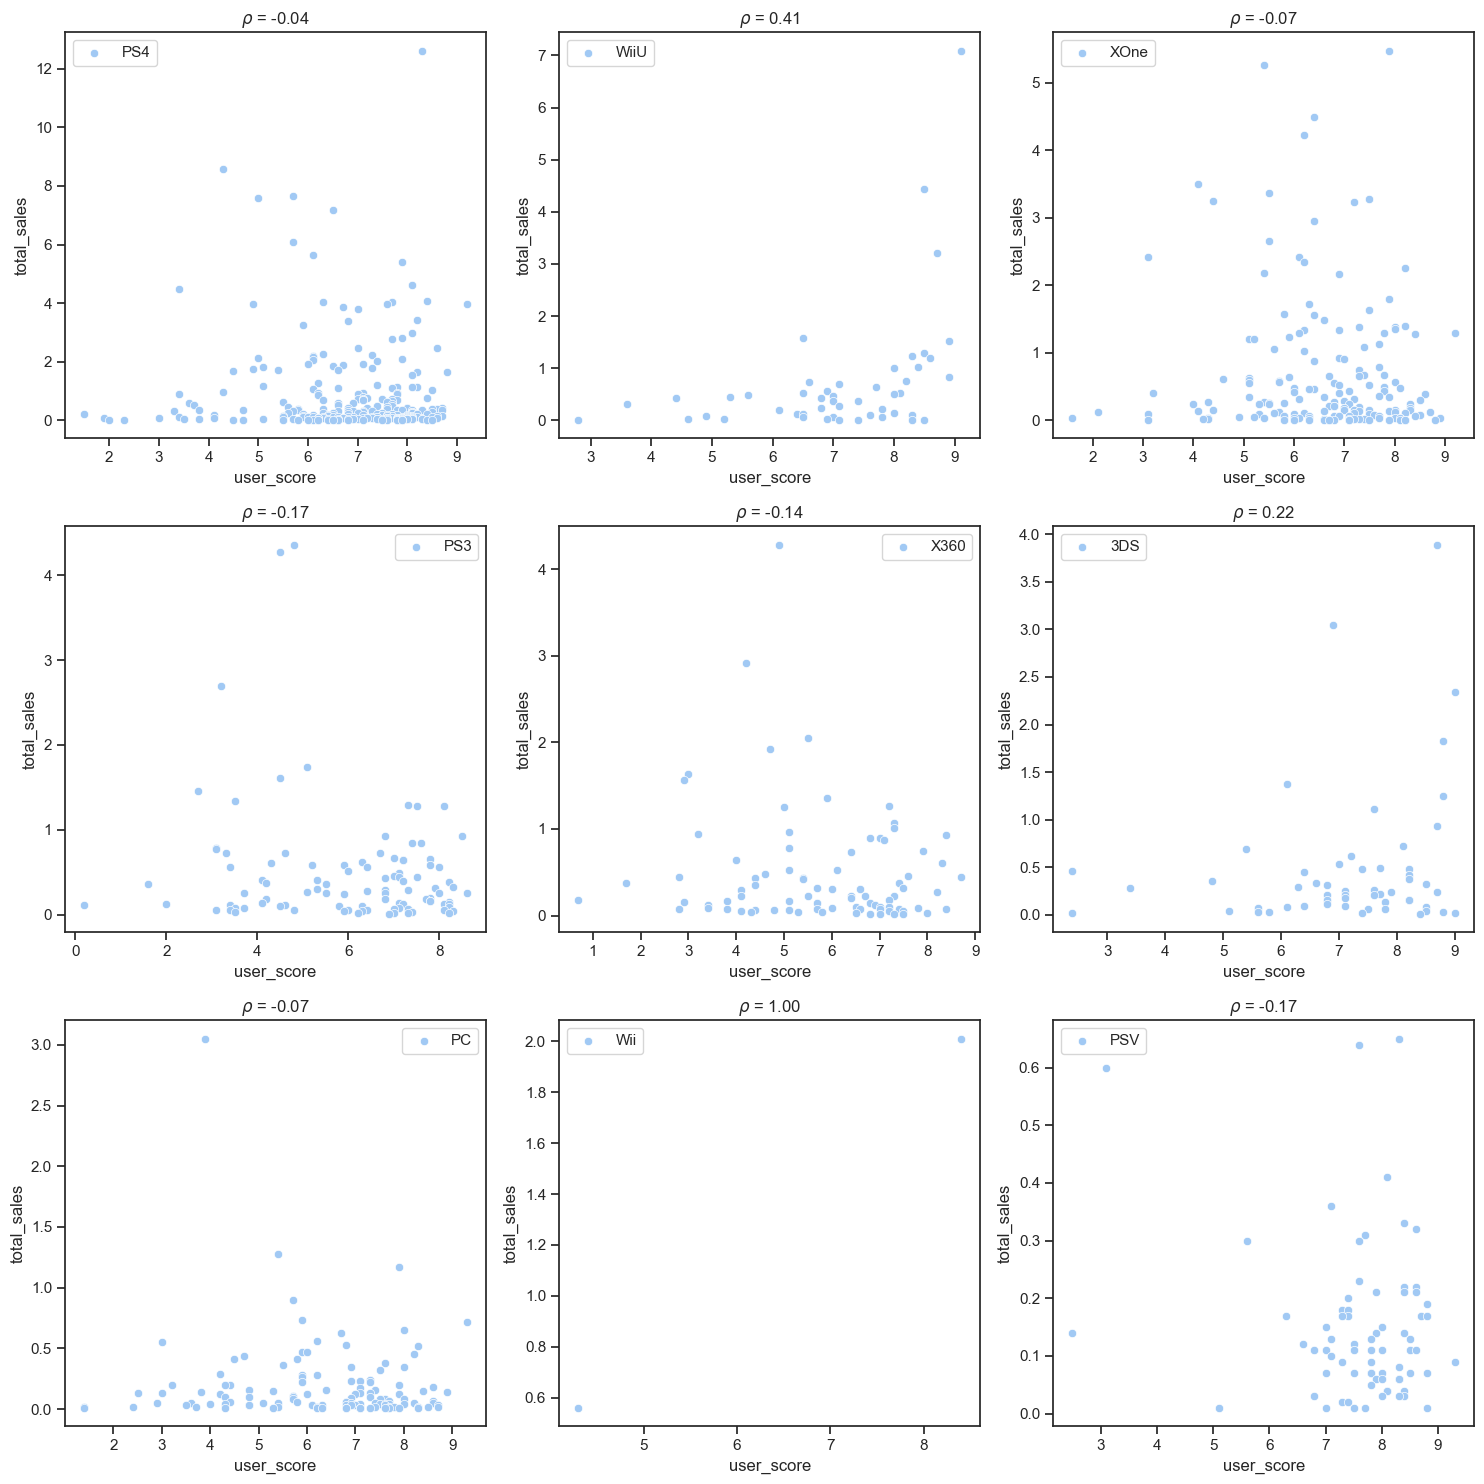

In [38]:
make_scatterplots_platform(data=games_data_relev, x="user_score", y="total_sales")

So, we see the following. 

The impact of user ratings does not show a strong impact on game sales: the values of the Pearson correlation coefficient for this variable fluctuate in the region 0-0.4 which does not allow us to conclude that user ratings have a strong impact on sales. There are platforms with correlations of 0.2-0.4, but nevertheless, mostly user ratings are weakly correlated with overall sales. Of course, judging by the diagram for the Wii, we have the maximum correlation, but this is due to the fact that we have only 2 observations left for this platform after filtering that does not allow us to draw any conclusion. 

As for the critics' ratings, the situation is somewhat different: the value of 0.53 for X360 sales is noteworthy, which shows not a strong, but moderate relationship between sales of games on this platform and critics' ratings. For other platforms, for example, PS4, XOne, WiiU, the correlation averages at 0.4, which may indicate a moderate relationship between game sales and ratings given by critics.

## Games genre analysis

Now let's take a look at the overall distribution of games by genre displaying for each genre the number of games, total sales, and median sales.

In [39]:
games_genres_data = games_data_relev.groupby("genre").agg(
    {"total_sales": ["count", "sum", "median"]}
)

games_genres_data.columns = ["count", "sum", "median"]

games_genres_data.sort_values(by="median", ascending=False)

,count,sum,median
genre,,,
Shooter,128,170.94,0.515
Sports,161,109.48,0.180
Platform,38,18.09,0.140
Fighting,60,28.22,0.125
Role-Playing,221,101.44,0.110
Simulation,44,13.13,0.100
Action,619,199.36,0.090
Misc,113,37.55,0.090
Racing,69,27.52,0.090


It would be incorrect to say here that maximum sales refer to the most profitable genres. However, we have sales by genre for different platforms in our data, and if one platform with its own game in this genre was profitable and the rest failed, then we will still see the maximum of total sales, even if the other platforms failed. But for games to be profitable, we need stable genres that generate income regardless of the platform, which means there should be a steady demand for this genre. Therefore, it is better to add a comparison of median sales, illustrating them with boxplots.

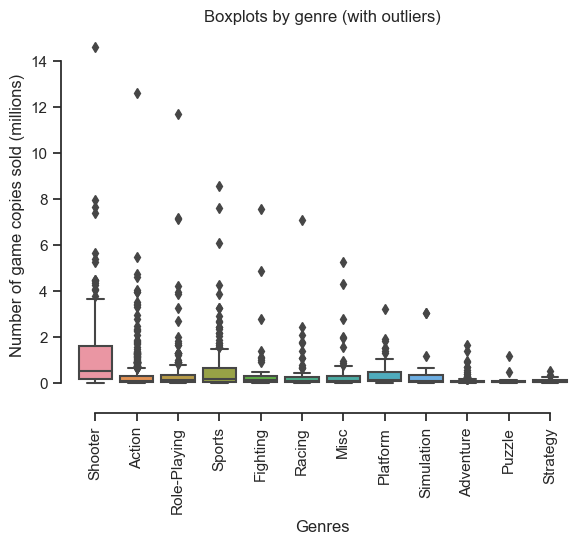

In [40]:
# Plotting boxplot by genre with outliers
figure = sns.boxplot(x="genre", y="total_sales", data=games_data_relev)
figure.set(
    title="Boxplots by genre (with outliers)",
    xlabel="Genres",
    ylabel="Number of game copies sold (millions)",
)
sns.despine(offset=10, trim=True)
figure.tick_params(axis="x", labelrotation=90)

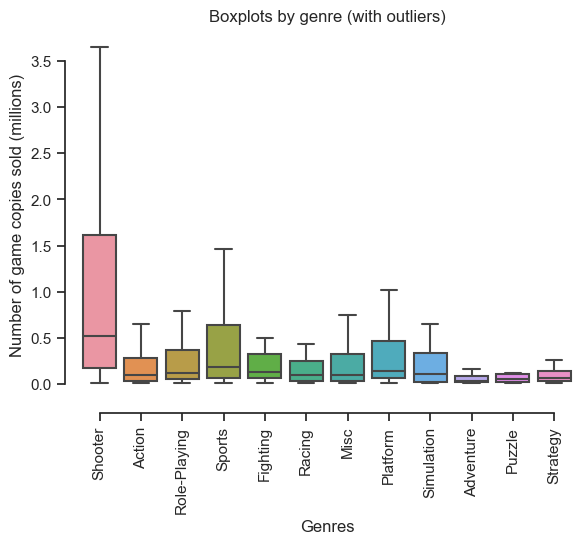

In [41]:
# Plotting boxplot by genre without outliers
figure = sns.boxplot(
    x="genre", y="total_sales", data=games_data_relev, showfliers=False
)
figure.set(
    title="Boxplots by genre (with outliers)",
    xlabel="Genres",
    ylabel="Number of game copies sold (millions)",
)
sns.despine(offset=10, trim=True)
figure.tick_params(axis="x", labelrotation=90)

We can see that judging by the median sales, the most potentially profitable investments are "Shooter" games, which can also be seen by the presence of large outliers, meaning that games of this genre have a chance to be lucrative. In addition, it also makes sense to include games of the "Action", "Role-Playing" and "Sports" genres here.

**Conclusion**

Based on the above analysis, it was found that user preferences change over time, which manifests itself in the obsolescence of old platforms and, accordingly, computer games and the emergence of new platforms and games. On average, platforms have existed for 9-11 years, but it is also true for most games and platforms that the growth of individual platforms continues for 5 years, after which the platform declines in terms of sales and disappears in 5 years. In order to select the current period, the time period of 2014-2016 was taken due to the rapidly changing environment of the computer games industry. Next, PS4, XOne, 3DS, as well as WiiU are promising platforms that can make a profit. This is especially true for PS4 and XOne, platforms that have appeared relatively recently, but which are showing growth. There was no strong correlation between user reviews and global sales: correlations do not reach the reference minimum values of at least 0.5-0.7, however, a number of platforms show a moderate correlation between critics' ratings and sales. Finally, among the genres of games, the most potentially profitable may be games of the genres "Action", "Shooter", "Role-Playing" and "Sports".

# User's regional portrait

Now let's take a look at the regional aspect of the data and consider the behavior of users in each region in terms of platforms, genres and ESRB ratings. For that, we can create a range of pie charts showcasing top-5 platforms, genres and ESRB ratings. This can be done by first building a DataFrame containing top-5 platforms, genres and ESRB ratings along with those that did not appear in top-5 rating ("Others" category). Thus, we can achieve this by writing the `top_five()` function. Next, we will use the result of calling such a function in another function - `make_pie_charts()`, which will plot three pie charts for each region by a specific feature.

In [42]:
def top_five(data, feature, region):
    """Compiles a rating of top-five elements of a specific feature in a specific region.

    Parameters
    ----------
    data : DataFrame
        DataFrame with games.
    feature : str
        Name of the feature by which to compile rating.
    region : str
        Name of the region which to consider.

    Returns
    -------
    top_five_data: DataFrame
        Object containing shares of sales in a region.
    """
    # Choosing a relevant column name by region
    col_name = region + "_sales"

    # Computing sales shares
    games_data_grouped = (
        data.groupby(feature).agg({col_name: "sum"}) / data[col_name].sum()
    )

    games_data_grouped = (
        games_data_grouped.round(3)
        .sort_values(by=col_name, ascending=False)
        .reset_index()
    )

    # Selecting top-5
    top_five_data = games_data_grouped[:5].copy()

    # If there are more than 5 rows in rating, create additional 'Others' category
    if len(games_data_grouped) > 5:
        others_data = pd.DataFrame(
            data={
                feature: "Others",
                col_name: [np.sum(games_data_grouped[col_name][5:])],
            }
        )
        top_five_data = pd.concat([top_five_data, others_data])
        top_five_data = top_five_data.reset_index(drop=True)

    return top_five_data

In [43]:
def make_pie_charts(data, feature, regions=("na", "eu", "jp")):
    """Makes a pie-chart for top-five elements of a specific region for all regions.

    Parameters
    ----------
    data : DataFrame
        DataFrame with games.
    feature : str
        Name of a feature.
    regions: tuple[str, str, str], default=("na", "eu", "jp")
        Name of the region.

    Notes
    -----
    Values in a tuple that `regions` can take are
    fixed and are not subject to change. Tuple can
    only include the following values:

        - "na" => North America
        - "eu" => European Union
        - "jp" => Japan
    """
    fig, axes = plt.subplots(1, len(regions), figsize=(5 * len(regions), 5))
    fig.suptitle(f"Top-5 {feature}s in regions\n")

    for i in range(len(axes)):
        col_name = regions[i] + "_sales"
        df = top_five(data=data, feature=feature, region=regions[i])
        axes[i].pie(x=df[col_name], labels=df[feature], autopct="%1.1f%%")
        axes[i].set_title(f"{regions[i].upper()}")

    plt.tight_layout()
    plt.show()

## Top-5 platforms by region

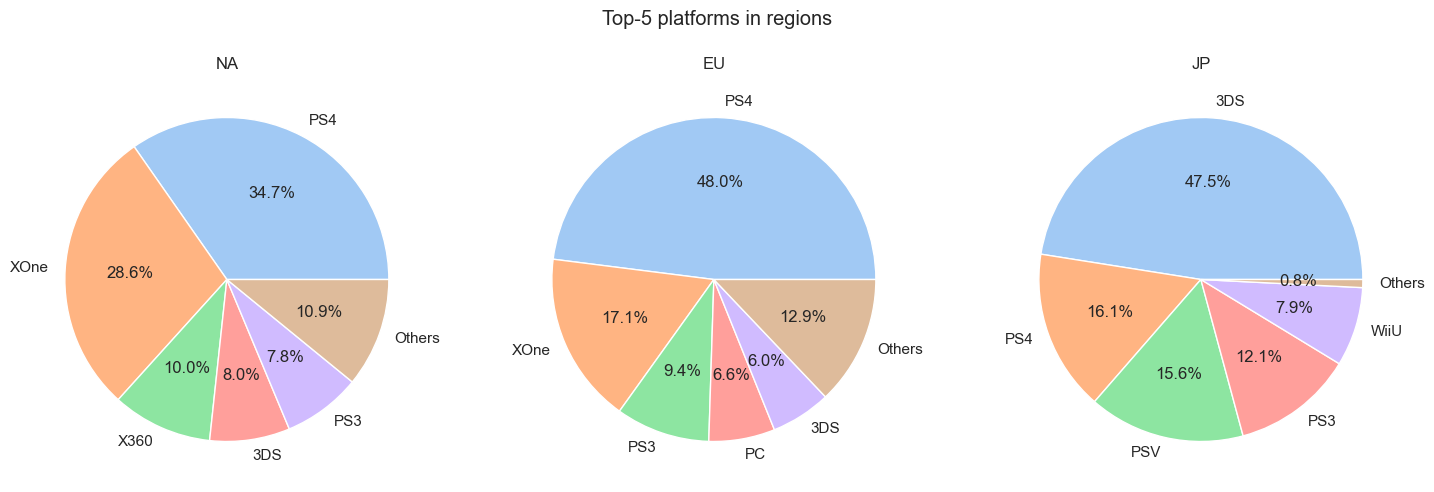

In [44]:
# Plotting pie charts for top-5 platforms by region
make_pie_charts(data=games_data_relev, feature="platform")

We can observe that PS4, PS3 and 3DS stand out in all regions. In North America and Europe, the most popular platform is PS4, and for Japan - 3DS, and Japanese users especially often use this platform, which is evident in the noticeable gap between the top 1 and top 2 for Japan. Also, Japan is characterized by the presence of WiiU in the rating, which is not present in other regions. Users of North America and Europe are somewhat similar: users prefer PS4, XOne and PS3, and in Japan, PS4, PS3 are also popular.

## Top-5 genres by region

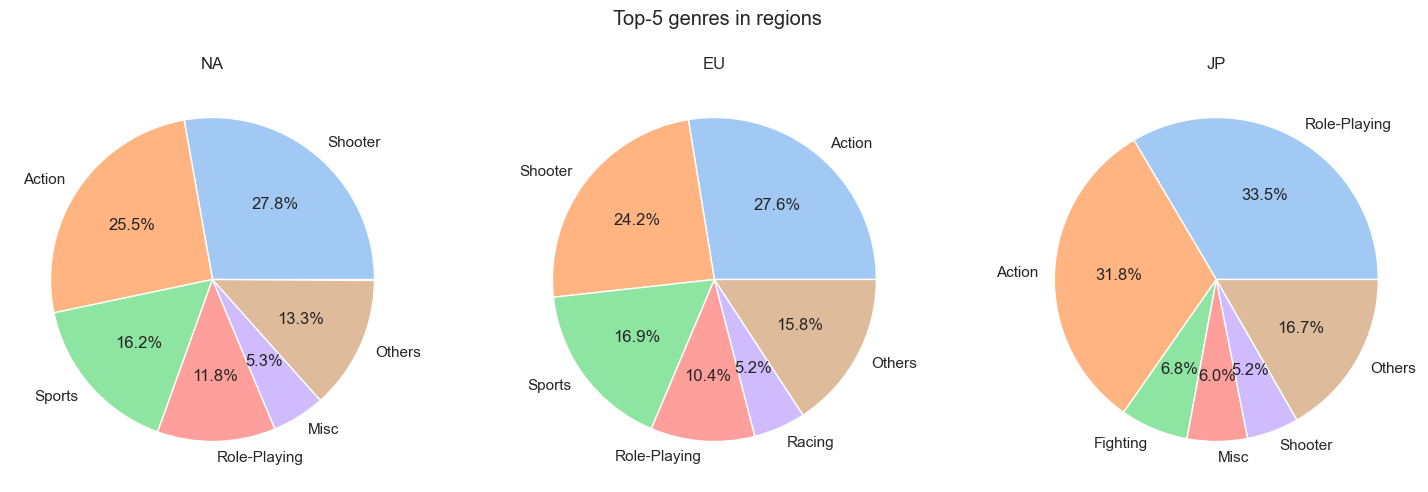

In [45]:
# Plotting pie charts for top-5 genres by region
make_pie_charts(data=games_data_relev, feature="genre")

We observe that the genre ratings for Europe and North America almost completely coincide with small differences in sales shares in these regions. Japanese users are characterized by almost the same set of genres, but there are also "Misc" and "Simulation" genres and there is no "Racing" genre.

## Top-5 ratings by region

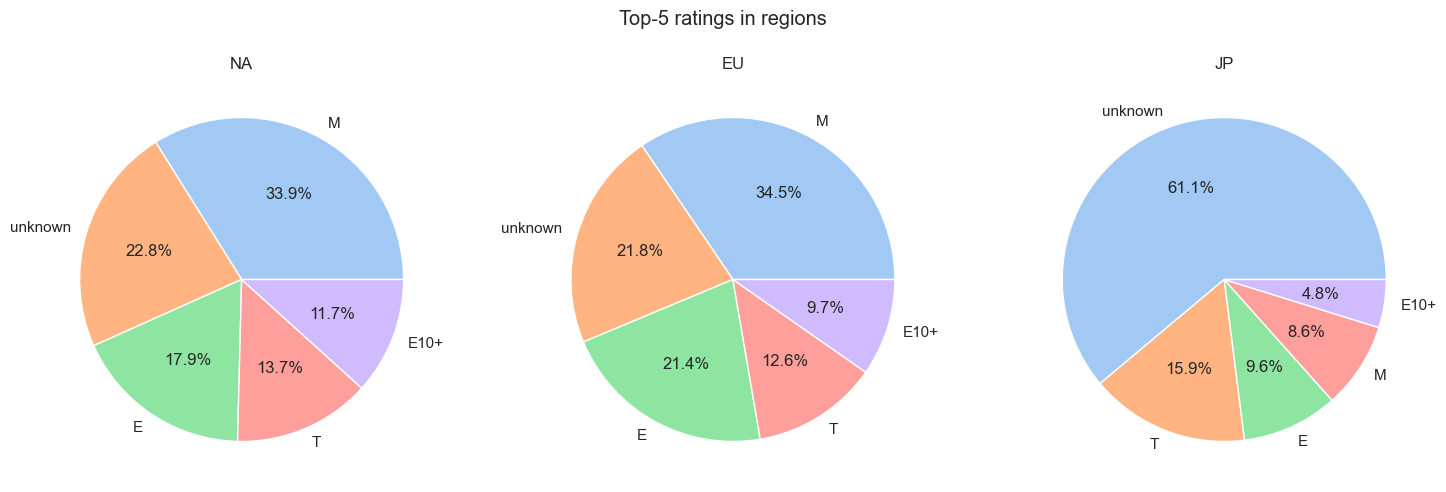

In [46]:
# Plotting pie charts for top-5 ratings by region
make_pie_charts(data=games_data_relev, feature="rating")

We see another evidence that users in Europe and North America are similar: the sales shares do not differ much, which is true for the ratings themselves - they are identical in such ratings. In these two regions, the most popular games are those that have been assigned M ratings, which usually corresponds to games with genres like "Action" or "Shooter", which was witnessed earlier. However, looking at the rating for Japan, we notice an interesting peculiarity: games of the "unknown" genre stood out, that is, those games that have no rating in the data and to which we assigned this value. More than 60% of sales are accounted for by this rating, which is the result of the lack of data on ratings awarded to games in Japan. Thus, we can say that in North America and Europe, the rating, namely M, affects sales, but in the case of Japan, nothing definite can be said.

**Conclusion**

In this section, the analysis of regional computer game markets was carried out. It was found that the most popular platforms are PS4, 3DS and XOne. Regarding genres, these are mainly "Action", "Shooter" and "Role-Playing" games. Finally, M-rated games are the most profitable for North America and Europe, which cannot be said with certainty about Japan.

# Hypotheses testing

## Test 1

Now let's test statistical hypotheses. First, let's see if the average user ratings of the XOne and PC platforms are equal. To do this, we will use the standard significance level of 5%, at which we will formulate the null and alternative hypotheses as follows.

```
H_0: User rating (user_score) of XOne = User rating (user_score) of PC
H_1: User rating (user_score) of XOne ≠ User rating (user_score) of PC
alpha = 0.05
```

As a criterion for evaluating and conducting statistical testing, we will use the *p-value* indicator, which will allow us to assert a significant or insignificant difference in the average of subsamples defined in the hypotheses. To do this, we determined the significance level of 5%, which in fact determined what difference to consider large (significant).

So, let's use the tools from the `scipy` library to test the hypothesis for the equality of two averages, where there is no reason to assert the equality of the variances of these two subsamples, and therefore we set `equal_var` to `False`.

In [47]:
# Filtering data
games_clean_data_user_score = games_data_relev[games_data_relev["user_score"] != -999]

# Conducting statistical test 1
results = st.ttest_ind(
    games_clean_data_user_score[games_clean_data_user_score["platform"] == "XOne"][
        "user_score"
    ],
    games_clean_data_user_score[games_clean_data_user_score["platform"] == "PC"][
        "user_score"
    ],
    equal_var=False,
)

# Displaying p-value
print(f"p-value: {results.pvalue}\n")

# Outcome if accepting the null
test_results_H0 = (
    "Test result: We do not have enough evidence to reject the null hypothesis."
)

# Outcome if rejecting the null
test_results_H1 = "Test result: We reject the null hypothesis."

# Determining the final outcome of the test
test_results = test_results_H1 if results.pvalue < ALPHA else test_results_H0

# Printing test results
print(test_results)

p-value: 0.11601398086668835

Test result: We do not have enough evidence to reject the null hypothesis.


So, the test says that *p-value* turned out to be large and much larger than 5%. This suggests that we cannot reject the null hypothesis that the average user ratings of the XOne and PC platforms are the same.

## Test 2

The second test that we will conduct will verify the hypothesis of whether the average user ratings of the "Action" and "Sports" genres are equal. Let's use the same strategy and test such a hypothesis at a significance level of 5%. Let's formulate statistical hypotheses.

```
H_0: User rating (user_score) of "Action" genre = User rating (user_score) of "Sports" genre
H_1: User rating (user_score) of "Action" genre ≠ User rating (user_score) of "Sports" genre
alpha = 0.05
```

In [48]:
# Conducting statistical test 2
results = st.ttest_ind(
    games_clean_data_user_score[games_clean_data_user_score["genre"] == "Action"][
        "user_score"
    ],
    games_clean_data_user_score[games_clean_data_user_score["genre"] == "Sports"][
        "user_score"
    ],
    equal_var=False,
)

print(f"p-value: {results.pvalue}\n")

test_results = test_results_H1 if results.pvalue < ALPHA else test_results_H0

print(test_results)

p-value: 1.1825550382644557e-14

Test result: We reject the null hypothesis.


Based on the available data, at the significance level of 5%, there are grounds to reject the null hypothesis of the equality of the average values of user ratings of the "Action" and "Sports" genres in favor of an alternative hypothesis.

# General conclusion

As part of this study, the computer games market was analyzed. The data obtained from open sources were checked for errors, and therefore a thorough data preprocessing was carried out: missing values were removed and replaced, where possible, data types were converted, new data was added. Thanks to this, it was possible to obtain the following results of research data analysis: user preferences changed from year to year, which forced them to switch from one gaming platform to another, which was taken into account in the process of conducting this study. It was not possible to establish a strong influence of user ratings on game sales, but we noted some relationship between sales and critics' ratings. Optimal combinations of "platform-genre-ESRB" have been found, which should be emphasized during budgeting for advertising campaigns. Regional data analysis allowed us to identify groups that can be taken into consideration during the preparation of advertising campaigns. Additionally, statistical hypotheses were tested. 

Thus, we highlight the following platforms in the computer games market that can be potentially profitable:

* **PS4**
* **XOne**

It is necessary to target games on the above gaming platforms with the following genre and rating:

* **Shooter (ESRB M)**

Lastly, we would like to recommend more carefully checking the availability of complete information about all computer games in order to obtain more accurate research results and identify promising products in a timely manner.